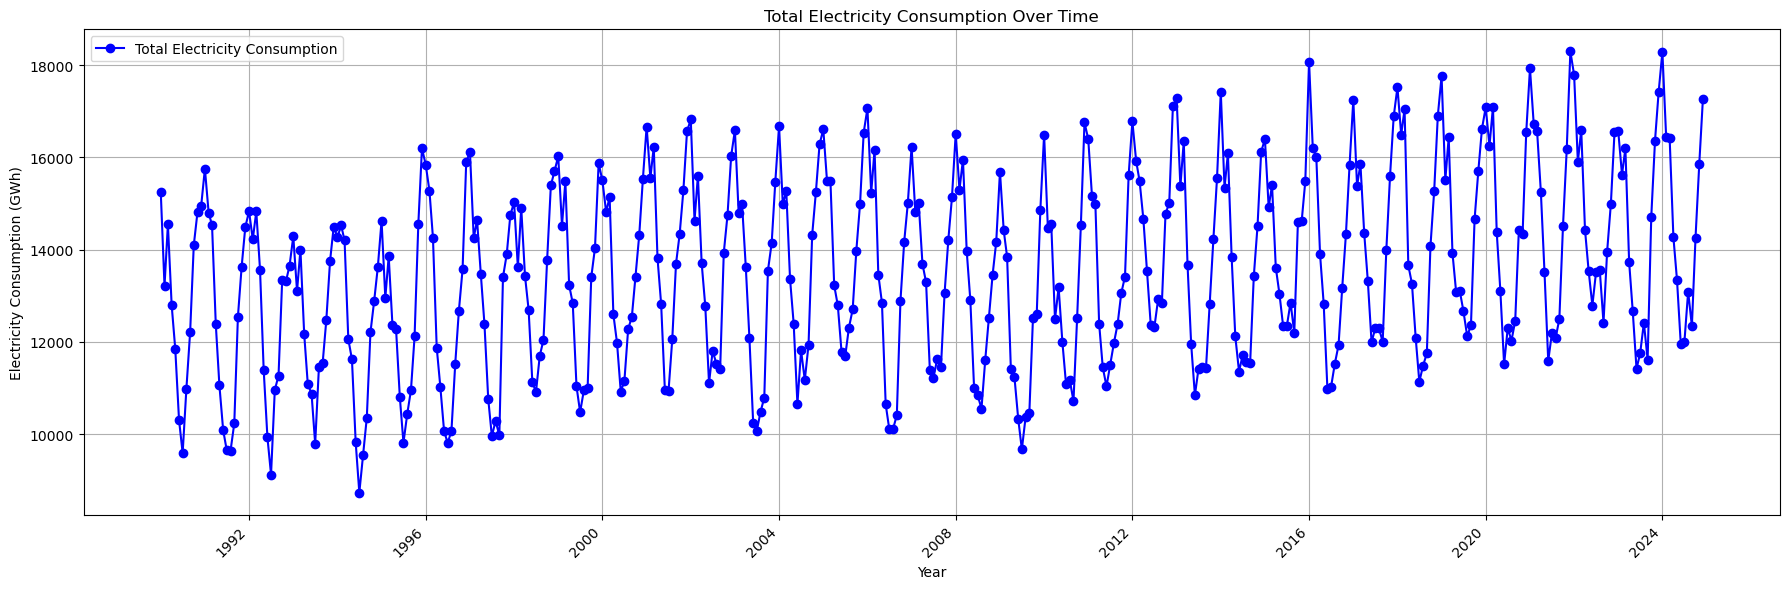

,monthandyear,season,mining and manufacturing,"electricity, gas, heat and water plants","railways, trams and bus traffic","other (residential sector, services, etc.)",export,domestic consumption,transmission network losses,losses excluding transmission network losses,losses,total electricity consumption
0,1990-01,Winter,4874,937,239,7468,594,14655,236,901,1137,15249
1,1990-02,Winter,4459,933,210,5897,891,12320,184,637,821,13211
2,1990-03,Spring,4918,1054,235,6048,1360,13188,208,725,933,14548
3,1990-04,Spring,4408,947,200,5112,1415,11388,182,539,721,12803
4,1990-05,Spring,4482,756,209,4241,1535,10310,184,438,622,11845
5,1990-06,Summer,4161,617,178,3420,1431,8881,183,322,505,10312
6,1990-07,Summer,3272,517,157,3666,1517,8073,199,262,461,9590


In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("ecd4.csv")
df["monthandyear"] = pd.to_datetime(df["monthandyear"], format="%Y-%m")

# Plotting total electricity consumption over time
plt.figure(figsize=(18, 6))
plt.plot(df["monthandyear"], df["total electricity consumption"], marker="o", linestyle="-", color="b", label="Total Electricity Consumption")

plt.xlabel("Year")
plt.ylabel("Electricity Consumption (GWh)")
plt.title("Total Electricity Consumption Over Time")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

df = pd.read_csv("ecd4.csv")
display(df.head(7))

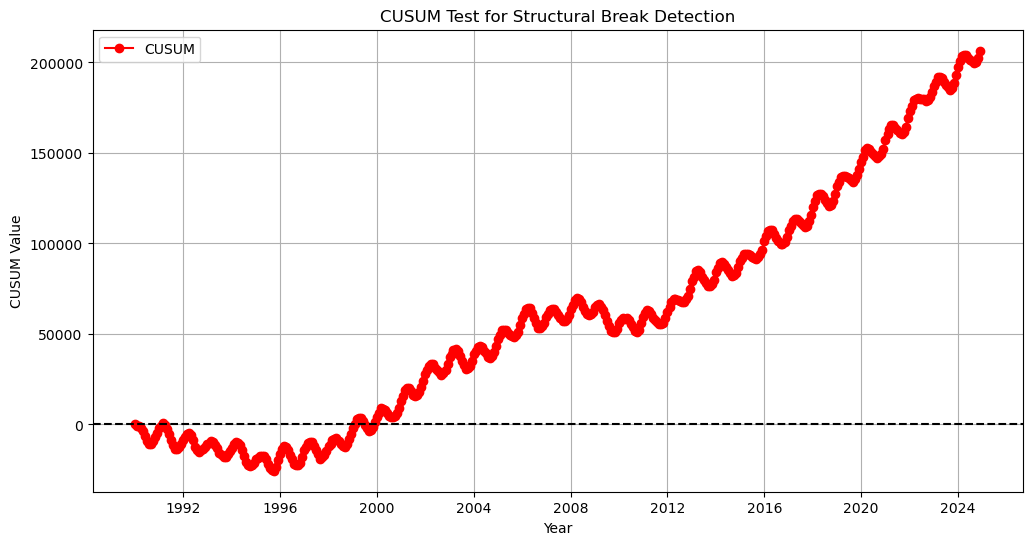

In [7]:
# Calculating cumulative sum of deviations from the mean
df["consumption_mean"] = df["total electricity consumption"].expanding().mean()
df["cusum"] = (df["total electricity consumption"] - df["consumption_mean"]).cumsum()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df["monthandyear"], df["cusum"], marker="o", linestyle="-", color="r", label="CUSUM")
plt.axhline(y=0, color="black", linestyle="--")
plt.xlabel("Year")
plt.ylabel("CUSUM Value")
plt.title("CUSUM Test for Structural Break Detection")
plt.legend()
plt.grid(True)
plt.show()
#CUMULATIVE SUM CONTROL CHART


- **Cumulative Sum Control Chart**: Detects changes in mean.
- **Sudden Jump**: Indicates a structural break.
- **Long-term Trend**: Despite some fluctuations, electricity consumption is increasing over time.
- **Short-term Variability**: Due to seasonal fluctuations or other short-term changes.

# 2) Average electricity consumption by sector

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

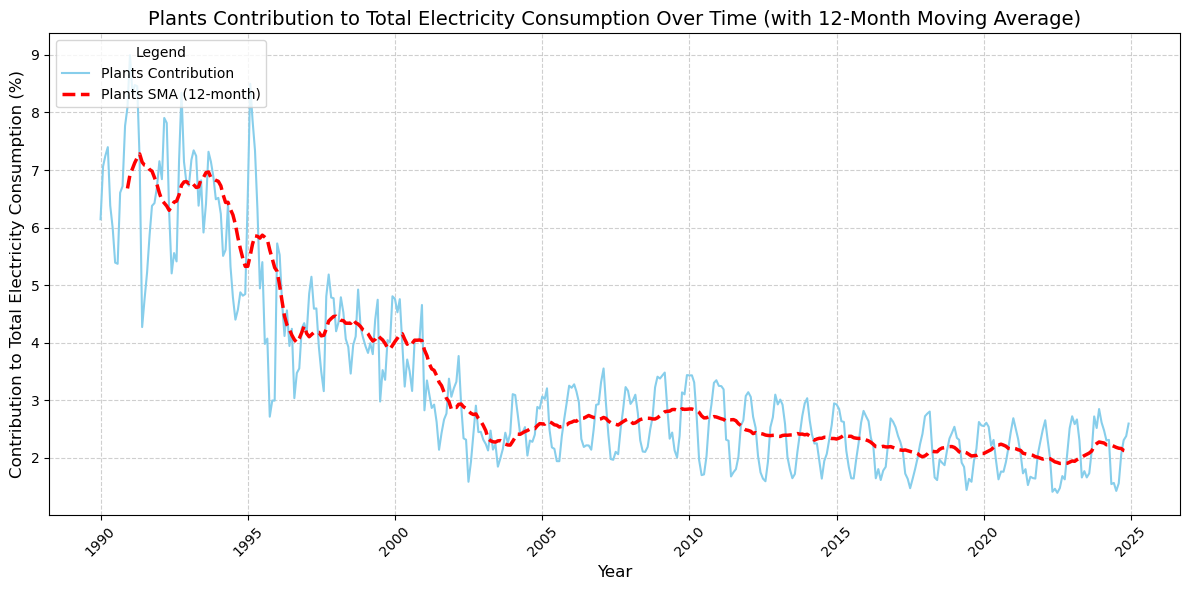

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the 'monthandyear' is in datetime format
df["monthandyear"] = pd.to_datetime(df["monthandyear"])

# ---- Calculating Plants Contribution to Total Consumption ----
df["plants_contribution"] = df["electricity, gas, heat and water plants"] / df["total electricity consumption"] * 100

# --- Adding 12-month Moving Average for Plants Contribution ---
df["plants_contribution_SMA"] = df["plants_contribution"].rolling(window=12).mean()

# --- Plotting Plants Contribution and Its 12-Month Moving Average ---
plt.figure(figsize=(12, 6))

# Plotting the actual plants contribution with the same "skyblue" as the bar graph
sns.lineplot(data=df, x="monthandyear", y="plants_contribution", label="Plants Contribution", linewidth=1.5, color="skyblue")

# Plotting the 12-month moving average with normal red
sns.lineplot(data=df, x="monthandyear", y="plants_contribution_SMA", label="Plants SMA (12-month)", linewidth=2.5, linestyle="--", color="red")

# Formatting the x-axis to show clear and fitting values
# Automatically determine the best x-axis tick locations and format them as years
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator(base=5))  # Every 5 years
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter("%Y"))  # Format as years

# Labels and title
plt.ylabel("Contribution to Total Electricity Consumption (%)", fontsize=12)
plt.xlabel("Year", fontsize=12)
plt.title("Plants Contribution to Total Electricity Consumption Over Time (with 12-Month Moving Average)", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="Legend", loc="upper left", fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

- ### Finding out the trend of electricity consumption by the above sectors.

In [11]:
df["monthandyear"] = pd.to_datetime(df["monthandyear"], errors='coerce')
df["year"] = df["monthandyear"].dt.year

# Function to calculate CAGR- COMPOUND ANNUAL GROWTH RATE
def calculate_cagr(start_value, end_value, years):
    return (end_value / start_value) ** (1 / years) - 1

# List of sectors to calculate CAGR for
sectors = ["mining and manufacturing", 
           "electricity, gas, heat and water plants", 
           "railways, trams and bus traffic", 
           "other (residential sector, services, etc.)"]

cagr_results = {}

# Loop
for sector in sectors:
    start_value = df[df["year"] == df["year"].min()][sector].values[0]
    end_value = df[df["year"] == df["year"].max()][sector].values[0]
    years = df["year"].max() - df["year"].min()
    
    # Calculating CAGR for the sector
    cagr = calculate_cagr(start_value, end_value, years)
    cagr_results[sector] = cagr


for sector, cagr in cagr_results.items():
    print(f"CAGR for {sector}: {cagr * 100:.2f}%")

CAGR for mining and manufacturing: -0.54%
CAGR for electricity, gas, heat and water plants: -1.96%
CAGR for railways, trams and bus traffic: 0.53%
CAGR for other (residential sector, services, etc.): 0.68%


-  The negative CAGR of **-0.54%** indicates that the electricity consumption in the mining and manufacturing sector has **decreased** on average by 0.54% each year over the period analyzed.
-  A negative CAGR of **-1.96%** indicates that electricity consumption in electricity, gas, heat, and water plants has **decreased** by an average of 1.96% per year.
-  The positive CAGR of **0.53%** suggests a slow but **steady increase** in electricity consumption in the railways, trams, and bus traffic sector, at an average rate of 0.53% per year.
-  A positive CAGR of **0.68%** means that the residential sector and services have seen an **increase** in electricity consumption at a rate of 0.68% per year.

In [ ]:
# Plotting the results to show nature of consumption.
cagr_df = pd.DataFrame(list(cagr_results.items()), columns=["Sector", "CAGR"])
plt.figure(figsize=(10, 6))
plt.bar(cagr_df["Sector"], cagr_df["CAGR"] * 100, color='skyblue')
plt.xlabel("Sector", fontsize=12)
plt.ylabel("CAGR (%)", fontsize=12)
plt.title("Compound Annual Growth Rate (CAGR) for Each Sector", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# 3) Average Electricity consumption by sectors in different seasons

<Figure size 1200x600 with 0 Axes>

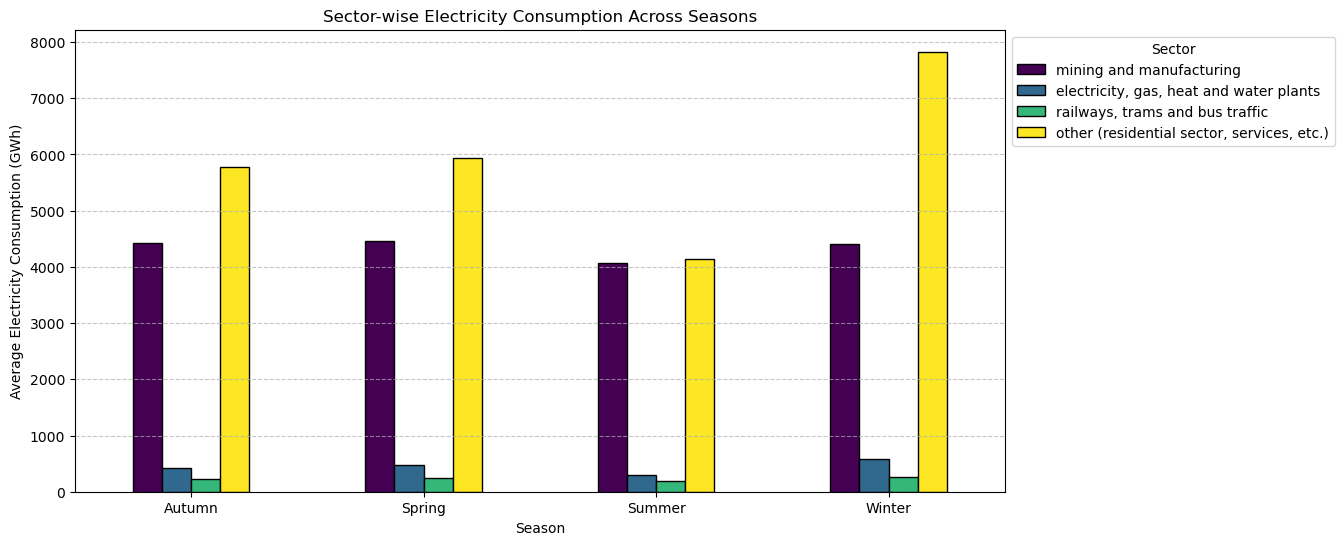

ANOVA Results for Sector-wise Seasonal Consumption Differences:

mining and manufacturing: F-statistic = 24.48,  p-value = 0.0000
electricity, gas, heat and water plants: F-statistic = 36.64,  p-value = 0.0000
railways, trams and bus traffic: F-statistic = 113.74,  p-value = 0.0000
other (residential sector, services, etc.): F-statistic = 386.20,  p-value = 0.0000


In [177]:
import seaborn as sns
import scipy.stats as stats

# Grouping data by season and calculating the mean for each sector
seasonal_avg_consumption = df.groupby("season")[
    ["mining and manufacturing",
     "electricity, gas, heat and water plants",
     "railways, trams and bus traffic",
     "other (residential sector, services, etc.)"]
].mean()

# Plotting sector-wise average consumption across seasons
plt.figure(figsize=(12, 6))
seasonal_avg_consumption.plot(kind="bar", figsize=(12, 6), colormap="viridis", edgecolor="black")

plt.xlabel("Season")
plt.ylabel("Average Electricity Consumption (GWh)")
plt.title("Sector-wise Electricity Consumption Across Seasons")
plt.xticks(rotation=0)
plt.legend(title="Sector", bbox_to_anchor=(1, 1))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# ----- ANOVA: To check if seasonal differences in sectoral consumption are statistically significant -----
# ANOVA - Analysis of Variance
sectors = ["mining and manufacturing",
           "electricity, gas, heat and water plants",
           "railways, trams and bus traffic",
           "other (residential sector, services, etc.)"]

# ANOVA for each sector
anova_results = {}
for sector in sectors:
    winter = df[df["season"] == "Winter"][sector]
    spring = df[df["season"] == "Spring"][sector]
    summer = df[df["season"] == "Summer"][sector]
    autumn = df[df["season"] == "Autumn"][sector]
    f_stat, p_value = stats.f_oneway(winter, spring, summer, autumn)
    anova_results[sector] = (f_stat, p_value)

print("ANOVA Results for Sector-wise Seasonal Consumption Differences:\n")
for sector, (f_stat, p_val) in anova_results.items():
    print(f"{sector}: F-statistic = {f_stat:.2f},  p-value = {p_val:.4f}")

**ANOVA statistical test results:**

- p-value < 0.05, indicating that the seasonal variations are statistically significant

 . 

# 4) Electricity consumption by different sectors over time:
    Each sector's contribution to toal electricity consumption,
    

<Figure size 1400x800 with 0 Axes>

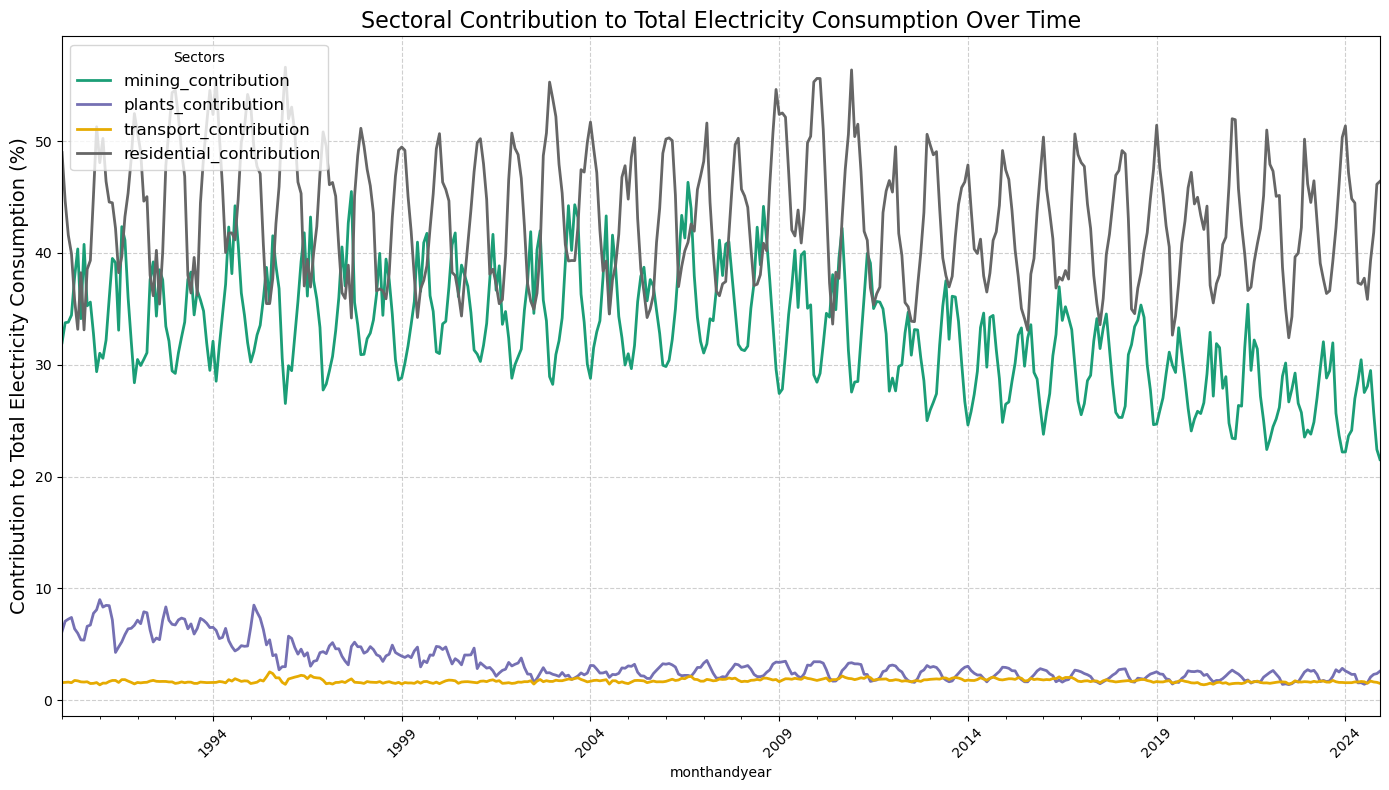

In [184]:
import seaborn as sns
from statsmodels.tsa.seasonal import STL

df["monthandyear"] = pd.to_datetime(df["monthandyear"])

# ---- Calculating Sectoral Contribution to Total Consumption ----
df["mining_contribution"] = df["mining and manufacturing"] / df["total electricity consumption"] * 100
df["plants_contribution"] = df["electricity, gas, heat and water plants"] / df["total electricity consumption"] * 100
df["transport_contribution"] = df["railways, trams and bus traffic"] / df["total electricity consumption"] * 100
df["residential_contribution"] = df["other (residential sector, services, etc.)"] / df["total electricity consumption"] * 100

# --- Plotting contribution percentages ---
plt.figure(figsize=(14, 8))
df.set_index("monthandyear")[["mining_contribution",
                              "plants_contribution",
                              "transport_contribution",
                              "residential_contribution"]].plot(kind="line", figsize=(14, 8), colormap="Dark2", linewidth=2)

plt.ylabel("Contribution to Total Electricity Consumption (%)", fontsize=14)
plt.title("Sectoral Contribution to Total Electricity Consumption Over Time", fontsize=16)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="Sectors", loc="upper left", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# do STL decomposition to analyse long-term sectoral trends


<Figure size 1400x800 with 0 Axes>

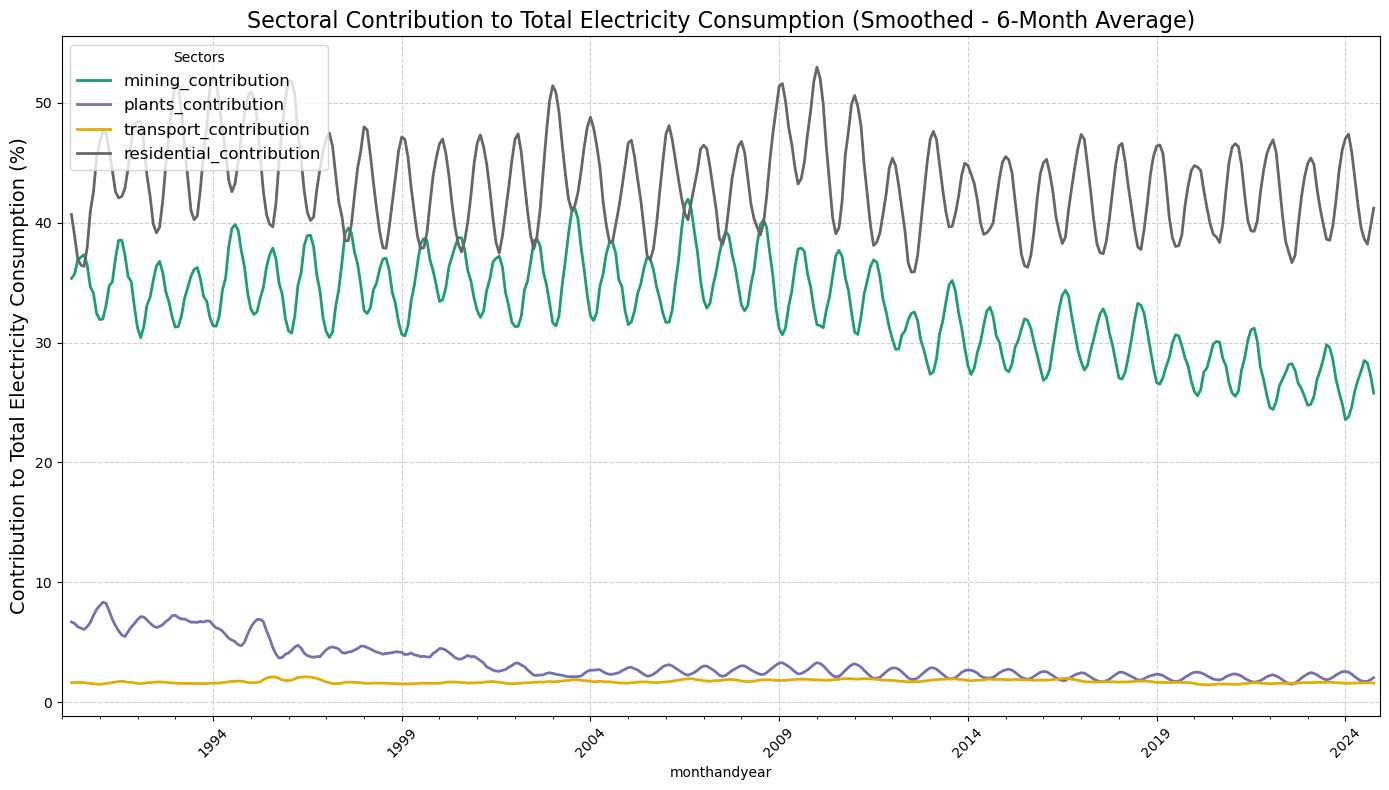

In [14]:
import seaborn as sns
from statsmodels.tsa.seasonal import STL
import pandas as pd
import matplotlib.pyplot as plt

# Ensure datetime conversion
df["monthandyear"] = pd.to_datetime(df["monthandyear"])

# ---- Calculating Sectoral Contribution to Total Consumption ----
df["mining_contribution"] = df["mining and manufacturing"] / df["total electricity consumption"] * 100
df["plants_contribution"] = df["electricity, gas, heat and water plants"] / df["total electricity consumption"] * 100
df["transport_contribution"] = df["railways, trams and bus traffic"] / df["total electricity consumption"] * 100
df["residential_contribution"] = df["other (residential sector, services, etc.)"] / df["total electricity consumption"] * 100

# --- Applying Rolling Average (6-month window) ---
rolling_window = 6  # Change this to adjust the smoothness of the trend
df_smooth = df.set_index("monthandyear")[["mining_contribution",
                                          "plants_contribution",
                                          "transport_contribution",
                                          "residential_contribution"]].rolling(window=rolling_window, center=True).mean()

# --- Plotting contribution percentages with Rolling Average ---
plt.figure(figsize=(14, 8))
df_smooth.plot(kind="line", figsize=(14, 8), colormap="Dark2", linewidth=2)

plt.ylabel("Contribution to Total Electricity Consumption (%)", fontsize=14)
plt.title(f"Sectoral Contribution to Total Electricity Consumption (Smoothed - {rolling_window}-Month Average)", fontsize=16)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="Sectors", loc="upper left", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- ### plants_contribution to electricity consumption has decreased overtime.


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

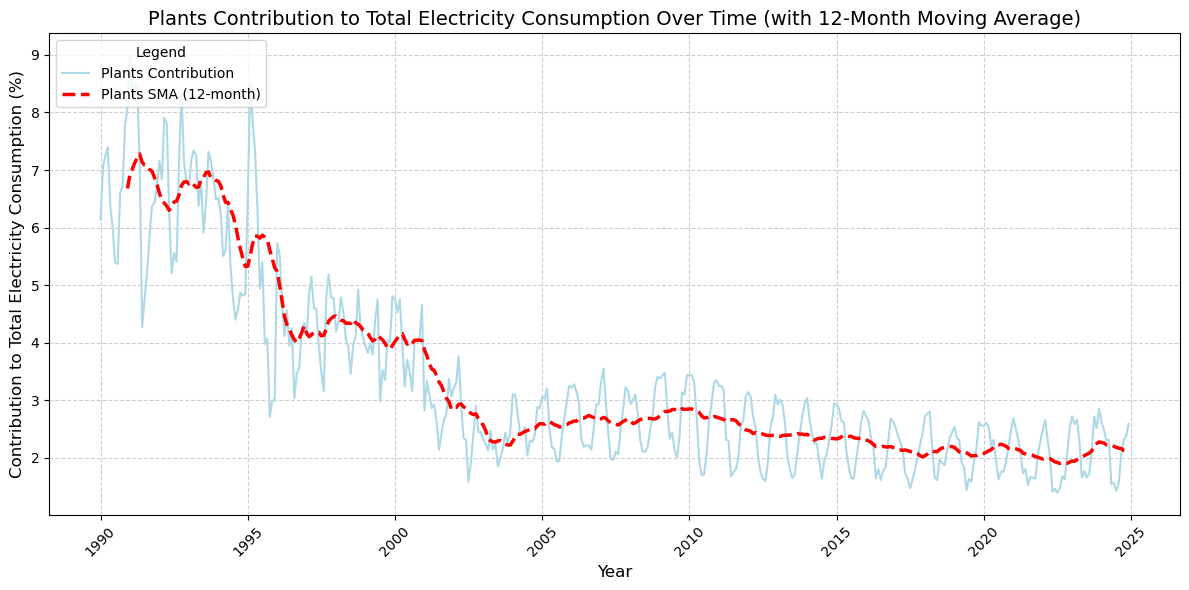

In [80]:
# plants_contribution to electricity consumption has decreased overtime

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the 'monthandyear' is in datetime format
df["monthandyear"] = pd.to_datetime(df["monthandyear"])

# ---- Calculating Plants Contribution to Total Consumption ----
df["plants_contribution"] = df["electricity, gas, heat and water plants"] / df["total electricity consumption"] * 100

# --- Adding 12-month Moving Average for Plants Contribution ---
df["plants_contribution_SMA"] = df["plants_contribution"].rolling(window=12).mean()

# --- Plotting Plants Contribution and Its 12-Month Moving Average ---
plt.figure(figsize=(12, 6))

# Plotting the actual plants contribution with normal light blue
sns.lineplot(data=df, x="monthandyear", y="plants_contribution", label="Plants Contribution", linewidth=1.5, color="lightblue")

# Plotting the 12-month moving average with normal red
sns.lineplot(data=df, x="monthandyear", y="plants_contribution_SMA", label="Plants SMA (12-month)", linewidth=2.5, linestyle="--", color="red")

# Formatting the x-axis to show clear and fitting values
# Automatically determine the best x-axis tick locations and format them as years
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator(base=5))  # Every 5 years
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter("%Y"))  # Format as years

# Labels and title
plt.ylabel("Contribution to Total Electricity Consumption (%)", fontsize=12)
plt.xlabel("Year", fontsize=12)
plt.title("Plants Contribution to Total Electricity Consumption Over Time (with 12-Month Moving Average)", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="Legend", loc="upper left", fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [60]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure monthandyear is in datetime format
df['monthandyear'] = pd.to_datetime(df['monthandyear'], errors='coerce')

# Calculate 12-month moving average for plants_contribution
df["plants_contribution_SMA"] = df["plants_contribution"].rolling(window=12).mean()

# --- Resampling to 5-year intervals and selecting numeric columns ---
df_resampled = df.set_index("monthandyear").resample('5Y').mean()

# --- Plotting Plants Contribution and 12-Month Moving Average ---
plt.figure(figsize=(14, 8))
plt.plot(df_resampled.index, df_resampled["plants_contribution"], label="Plants Contribution (5-Year Avg)", color='blue', marker='o')
plt.plot(df.index, df["plants_contribution_SMA"], label="12-Month Moving Average", color='red', linestyle='--', linewidth=2)

plt.title("Plants Contribution and 12-Month Moving Average (5-Year Resampling)")
plt.xlabel("Year")
plt.ylabel("Plants Contribution")
plt.legend()
plt.grid(True)
plt.show()

TypeError: agg function failed [how->mean,dtype->object]

# 5) Sectoral and seasonal relationship

## Sector - season trends

- Utilising **Seasonality Strength Index (SSI)** to measure how seasonality affects each sector.
    - If a sector has a high SSI (e.g., >100%), it means that this sector is more affected by seasonal changes.
    - If a sector has a low SSI, this suggests that seasonal fluctuations have a smaller effect on the sector’s electricity consumption.



In [191]:
from sklearn.preprocessing import MinMaxScaler

sectors_to_normalize = [
    'mining and manufacturing',
    'electricity, gas, heat and water plants',
    'railways, trams and bus traffic',
    'other (residential sector, services, etc.)'
]
# Applying Min-Max scaling
scaler = MinMaxScaler()

# Normalizing
df[sectors_to_normalize] = scaler.fit_transform(df[sectors_to_normalize])
seasons = df['season'].unique()
ssi_values_normalized = {}

for sector in sectors_to_normalize:
    sector_seasonal_effects = []
    for season in seasons:
        season_data = df[df['season'] == season][sector]
        seasonal_effect = season_data.mean()
        sector_seasonal_effects.append(seasonal_effect)

    ssi = (max(sector_seasonal_effects) - min(sector_seasonal_effects)) / max(sector_seasonal_effects)
    ssi_values_normalized[sector] = ssi

ssi_values_normalized

{'mining and manufacturing': 0.2846127719845932,
 'electricity, gas, heat and water plants': 0.7019526763151849,
 'railways, trams and bus traffic': 0.5610265841832469,
 'other (residential sector, services, etc.)': 0.8343198710100191}

- **Mining and Manufacturing (SSI: 0.28):** Electricity consumption in this sector is minimally affected by seasonal variations.
- **Electricity, Gas, Heat, and Water Plants (SSI: 0.70):** This sector experiences seasonal fluctuations in electricity consumption.
- **Railways, Trams, and Bus Traffic (SSI: 0.56):** Seasonal changes moderately affect electricity consumption in this sector.
- **Other (Residential Sector, Services, etc.) (SSI: 0.83):** This sector has significant seasonal variations in electricity consumption due to factors like heating and cooling needs.

# 6) Does domestic consumption has a strong negative correlation with exports?

Checking if domestic consumption has a strong negative correlation with exports by calculating:
- Pearson correlation and Spearman correlation
      - Values close to -1 indicates strong negative correlation

In [107]:
pearson_corr = df["domestic consumption"].corr(df["export"], method="pearson")
spearman_corr = df["domestic consumption"].corr(df["export"], method="spearman")

print("Pearson Correlation:", pearson_corr)
print("Spearman Correlation:", spearman_corr)

Pearson Correlation: -0.22716554639403846
Spearman Correlation: -0.24339253539239897


- The results do not indicate a strong negative correlation.
- While there is a slight inverse relationship, it is not strong enough to conclude that lower domestic consumption directly drives higher exports.

# 7) Do summer exports increase when domestic consumption is lower?

- Comparing mean exports, calculating p-value for T-test and Mann-Whitney U-test to check statistical significance.

In [203]:
import scipy.stats as stats

if "season" not in df.columns:
    print("Season column missing. Please ensure data has season info.")
else:
    summer_data = df[df["season"] == "Summer"]

    # Compute correlation between exports and domestic consumption in summer
    pearson_corr = summer_data["export"].corr(summer_data["domestic consumption"], method="pearson")
    spearman_corr = summer_data["export"].corr(summer_data["domestic consumption"], method="spearman")

    # Categorize into high and low domestic consumption (median split)
    median_domestic = summer_data["domestic consumption"].median()
    high_domestic = summer_data[summer_data["domestic consumption"] > median_domestic]["export"]
    low_domestic = summer_data[summer_data["domestic consumption"] <= median_domestic]["export"]

    # Perform statistical test (T-test or Mann-Whitney U test based on normality)
    t_stat, p_value = stats.ttest_ind(high_domestic, low_domestic, equal_var=False)
    u_stat, u_p_value = stats.mannwhitneyu(high_domestic, low_domestic)

    # Print results
    print(f"Pearson Correlation (Summer): {pearson_corr}")
    print(f"Spearman Correlation (Summer): {spearman_corr}\n")
    print(f"Mean exports (Low Domestic Consumption): {low_domestic.mean()}")
    print(f"Mean exports (High Domestic Consumption): {high_domestic.mean()}\n")
    print(f"T-test p-value: {p_value} (Significant if < 0.05)")
    print(f"Mann-Whitney U-test p-value: {u_p_value} (Significant if < 0.05)")

Pearson Correlation (Summer): -0.1403725832309858
Spearman Correlation (Summer): -0.2153292711696365

Mean exports (Low Domestic Consumption): 2098.0377358490564
Mean exports (High Domestic Consumption): 1731.1923076923076

T-test p-value: 0.03886082744201179 (Significant if < 0.05)
Mann-Whitney U-test p-value: 0.044508713505052026 (Significant if < 0.05)


**Interpret p-values:**
- If p-value < 0.05, the difference in exports between high and low domestic consumption is statistically significant.
- Meaning: There is strong evidence that exports increase when domestic consumption is lower in summer.
- If p-value > 0.05, the difference is not statistically significant.
-  Meaning: No strong evidence to confirm the hypothesis.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

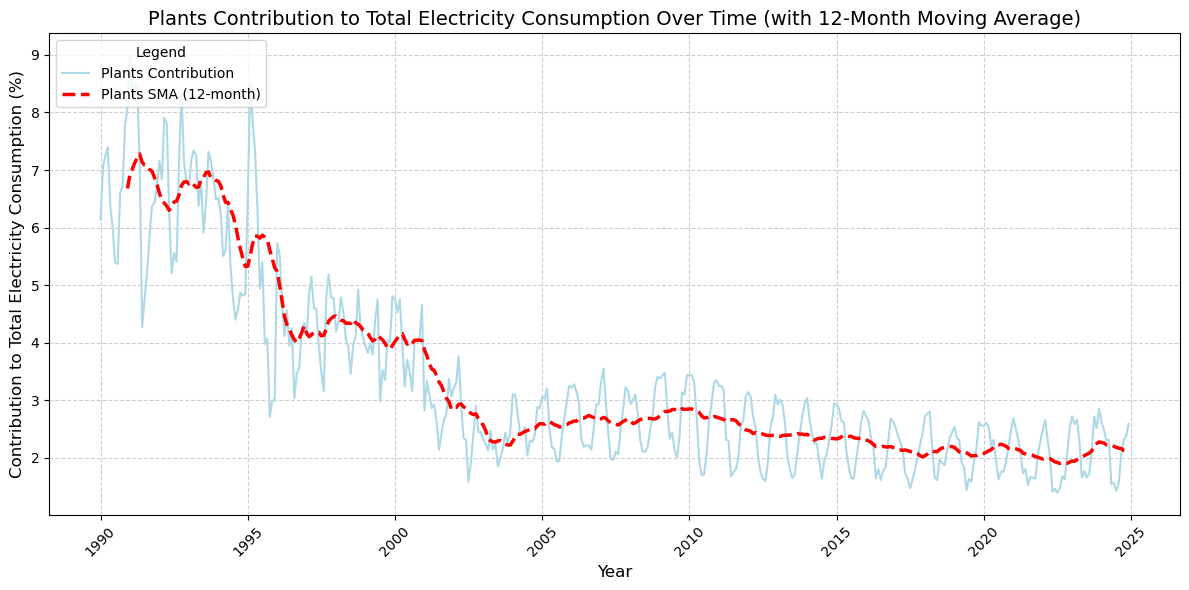

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the 'monthandyear' is in datetime format
df["monthandyear"] = pd.to_datetime(df["monthandyear"])

# ---- Calculating Plants Contribution to Total Consumption ----
df["plants_contribution"] = df["electricity, gas, heat and water plants"] / df["total electricity consumption"] * 100

# --- Adding 12-month Moving Average for Plants Contribution ---
df["plants_contribution_SMA"] = df["plants_contribution"].rolling(window=12).mean()

# --- Plotting Plants Contribution and Its 12-Month Moving Average ---
plt.figure(figsize=(12, 6))

# Plotting the actual plants contribution with light blue
sns.lineplot(data=df, x="monthandyear", y="plants_contribution", label="Plants Contribution", linewidth=1.5, color="lightblue")

# Plotting the 12-month moving average with normal red
sns.lineplot(data=df, x="monthandyear", y="plants_contribution_SMA", label="Plants SMA (12-month)", linewidth=2.5, linestyle="--", color="red")

# Formatting the x-axis to show clear and fitting values
# Automatically determine the best x-axis tick locations and format them as years
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator(base=5))  # Every 5 years
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter("%Y"))  # Format as years

# Labels and title
plt.ylabel("Contribution to Total Electricity Consumption (%)", fontsize=12)
plt.xlabel("Year", fontsize=12)
plt.title("Plants Contribution to Total Electricity Consumption Over Time (with 12-Month Moving Average)", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="Legend", loc="upper left", fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

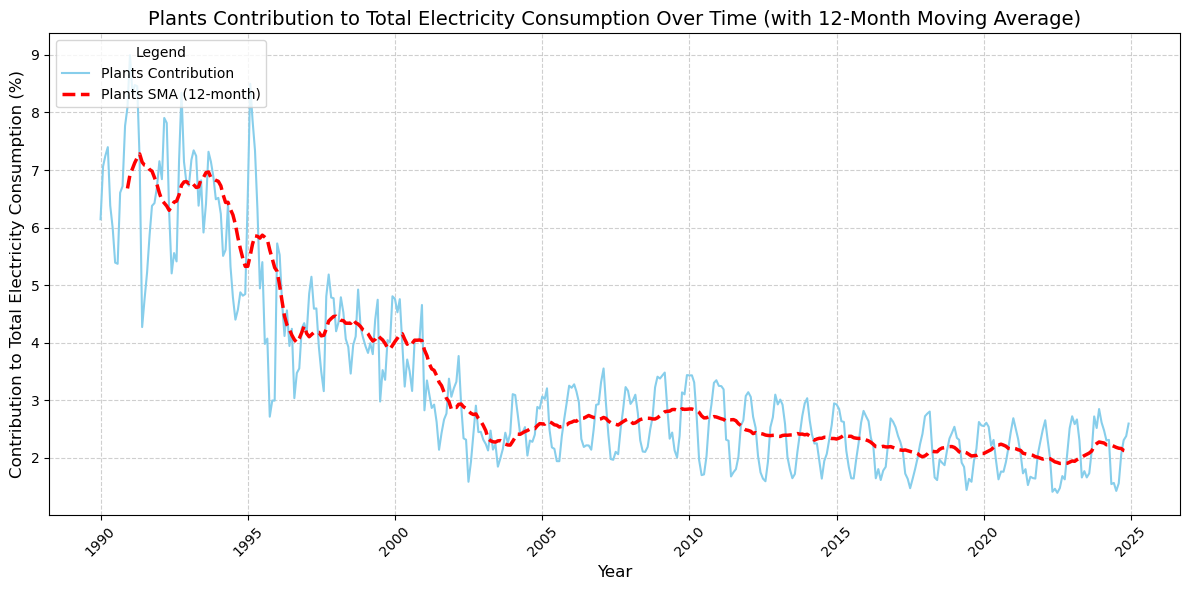

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the 'monthandyear' is in datetime format
df["monthandyear"] = pd.to_datetime(df["monthandyear"])

# ---- Calculating Plants Contribution to Total Consumption ----
df["plants_contribution"] = df["electricity, gas, heat and water plants"] / df["total electricity consumption"] * 100

# --- Adding 12-month Moving Average for Plants Contribution ---
df["plants_contribution_SMA"] = df["plants_contribution"].rolling(window=12).mean()

# --- Plotting Plants Contribution and Its 12-Month Moving Average ---
plt.figure(figsize=(12, 6))

# Plotting the actual plants contribution with sky blue
sns.lineplot(data=df, x="monthandyear", y="plants_contribution", label="Plants Contribution", linewidth=1.5, color="skyblue")

# Plotting the 12-month moving average with normal red
sns.lineplot(data=df, x="monthandyear", y="plants_contribution_SMA", label="Plants SMA (12-month)", linewidth=2.5, linestyle="--", color="red")

# Formatting the x-axis to show clear and fitting values
# Automatically determine the best x-axis tick locations and format them as years
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator(base=5))  # Every 5 years
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter("%Y"))  # Format as years

# Labels and title
plt.ylabel("Contribution to Total Electricity Consumption (%)", fontsize=12)
plt.xlabel("Year", fontsize=12)
plt.title("Plants Contribution to Total Electricity Consumption Over Time (with 12-Month Moving Average)", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="Legend", loc="upper left", fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

<Figure size 1200x600 with 0 Axes>

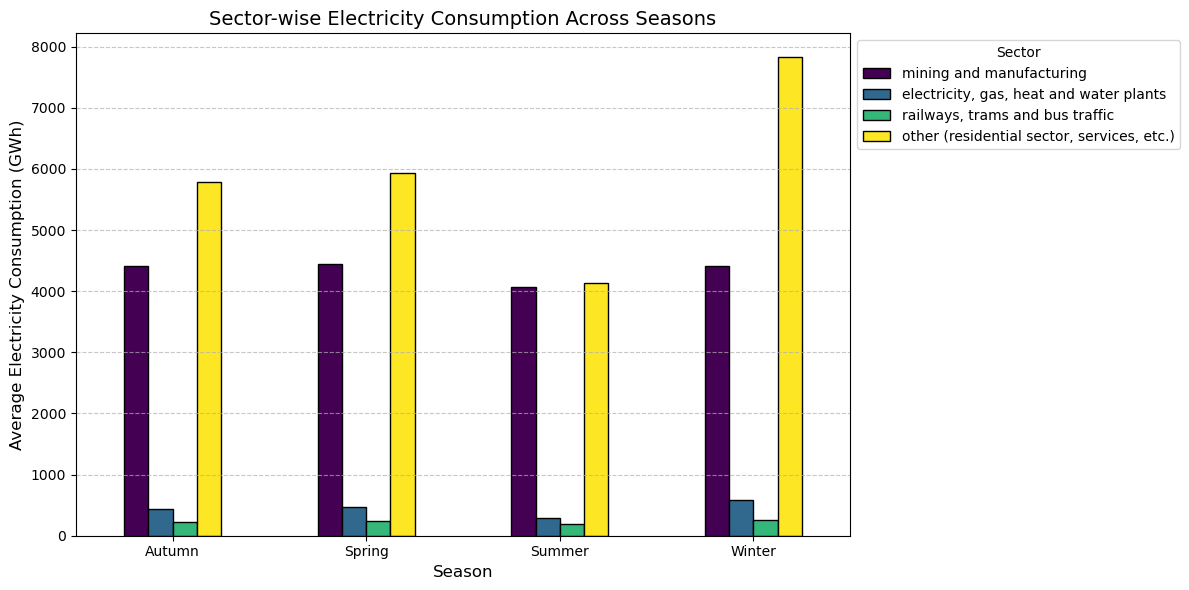

ANOVA Results for Sector-wise Seasonal Consumption Differences:

mining and manufacturing: F-statistic = 24.48,  p-value = 0.0000
electricity, gas, heat and water plants: F-statistic = 36.64,  p-value = 0.0000
railways, trams and bus traffic: F-statistic = 113.74,  p-value = 0.0000
other (residential sector, services, etc.): F-statistic = 386.20,  p-value = 0.0000


In [70]:
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

# Grouping data by season and calculating the mean for each sector
seasonal_avg_consumption = df.groupby("season")[
    ["mining and manufacturing",
     "electricity, gas, heat and water plants",
     "railways, trams and bus traffic",
     "other (residential sector, services, etc.)"]
].mean()

# Plotting sector-wise average consumption across seasons
plt.figure(figsize=(12, 6))
seasonal_avg_consumption.plot(kind="bar", figsize=(12, 6), colormap="viridis", edgecolor="black")

# Labels and title
plt.xlabel("Season", fontsize=12)
plt.ylabel("Average Electricity Consumption (GWh)", fontsize=12)
plt.title("Sector-wise Electricity Consumption Across Seasons", fontsize=14)
plt.xticks(rotation=0)
plt.legend(title="Sector", bbox_to_anchor=(1, 1), fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Save the plot as a PDF (vectorized format)
plt.savefig("seasonal_consumption_plot.pdf", format="pdf", bbox_inches="tight")

# Show the plot (optional)
plt.show()

# ----- ANOVA: To check if seasonal differences in sectoral consumption are statistically significant -----
# ANOVA - Analysis of Variance
sectors = ["mining and manufacturing",
           "electricity, gas, heat and water plants",
           "railways, trams and bus traffic",
           "other (residential sector, services, etc.)"]

# ANOVA for each sector
anova_results = {}
for sector in sectors:
    winter = df[df["season"] == "Winter"][sector]
    spring = df[df["season"] == "Spring"][sector]
    summer = df[df["season"] == "Summer"][sector]
    autumn = df[df["season"] == "Autumn"][sector]
    f_stat, p_value = stats.f_oneway(winter, spring, summer, autumn)
    anova_results[sector] = (f_stat, p_value)

# Print ANOVA results
print("ANOVA Results for Sector-wise Seasonal Consumption Differences:\n")
for sector, (f_stat, p_val) in anova_results.items():
    print(f"{sector}: F-statistic = {f_stat:.2f},  p-value = {p_val:.4f}")

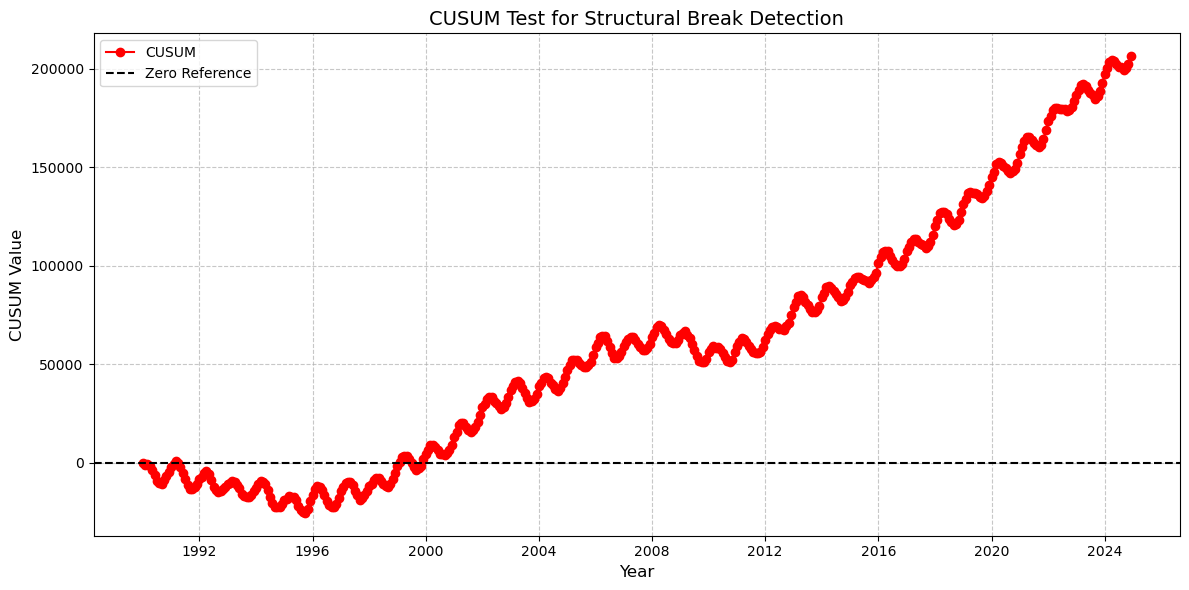

In [72]:
import matplotlib.pyplot as plt

# Calculating cumulative sum of deviations from the mean
df["consumption_mean"] = df["total electricity consumption"].expanding().mean()
df["cusum"] = (df["total electricity consumption"] - df["consumption_mean"]).cumsum()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df["monthandyear"], df["cusum"], marker="o", linestyle="-", color="r", label="CUSUM")
plt.axhline(y=0, color="black", linestyle="--", label="Zero Reference")

# Labels and title
plt.xlabel("Year", fontsize=12)
plt.ylabel("CUSUM Value", fontsize=12)
plt.title("CUSUM Test for Structural Break Detection", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()

# Save the plot as a PDF (vectorized format)
plt.savefig("cusum_plot.pdf", format="pdf", bbox_inches="tight")

# Show the plot (optional)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

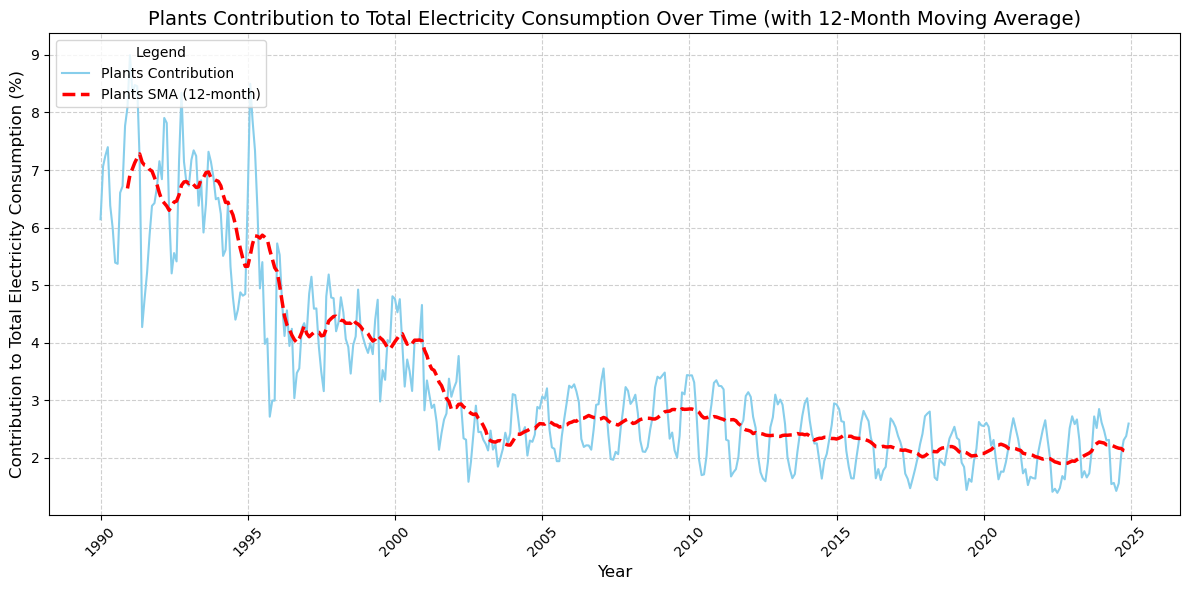

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the 'monthandyear' is in datetime format
df["monthandyear"] = pd.to_datetime(df["monthandyear"])

# ---- Calculating Plants Contribution to Total Consumption ----
df["plants_contribution"] = df["electricity, gas, heat and water plants"] / df["total electricity consumption"] * 100

# --- Adding 12-month Moving Average for Plants Contribution ---
df["plants_contribution_SMA"] = df["plants_contribution"].rolling(window=12).mean()

# --- Plotting Plants Contribution and Its 12-Month Moving Average ---
plt.figure(figsize=(12, 6))

# Plotting the actual plants contribution with "skyblue"
sns.lineplot(data=df, x="monthandyear", y="plants_contribution", label="Plants Contribution", linewidth=1.5, color="skyblue")

# Plotting the 12-month moving average with "red"
sns.lineplot(data=df, x="monthandyear", y="plants_contribution_SMA", label="Plants SMA (12-month)", linewidth=2.5, linestyle="--", color="red")

# Formatting the x-axis to show clear and fitting values
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator(base=5))  # Every 5 years
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter("%Y"))  # Format as years

# Labels and title
plt.ylabel("Contribution to Total Electricity Consumption (%)", fontsize=12)
plt.xlabel("Year", fontsize=12)
plt.title("Plants Contribution to Total Electricity Consumption Over Time (with 12-Month Moving Average)", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="Legend", loc="upper left", fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot as a PDF (vectorized format)
plt.savefig("plants_contribution_plot.pdf", format="pdf", bbox_inches="tight")

# Show the plot (optional)
plt.show()

<Figure size 1200x600 with 0 Axes>

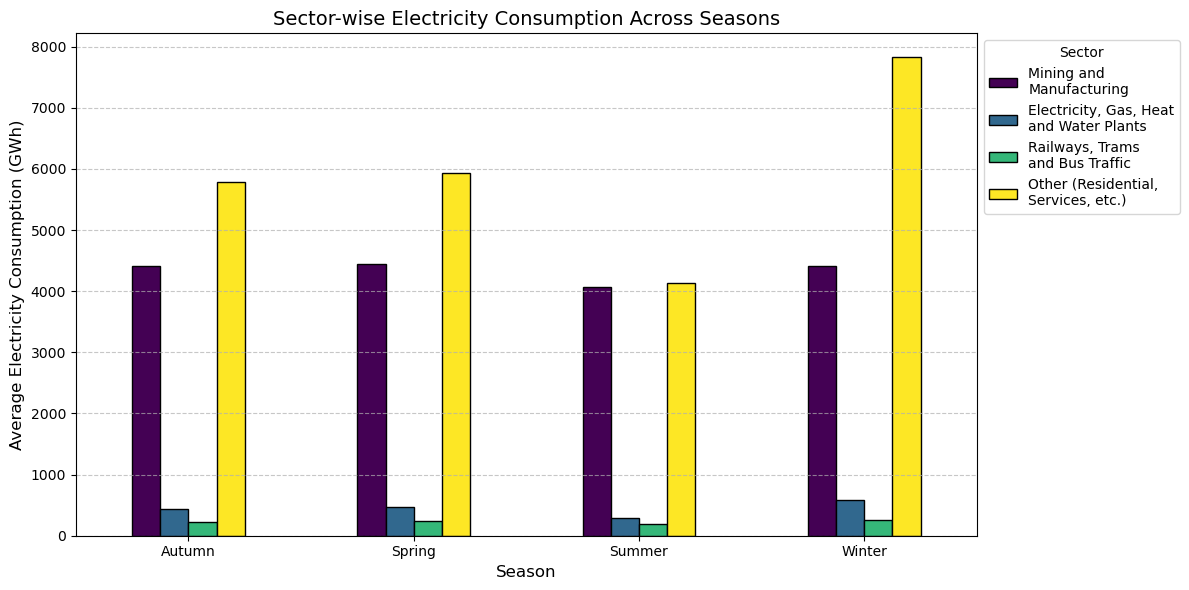

ANOVA Results for Sector-wise Seasonal Consumption Differences:

mining and manufacturing: F-statistic = 24.48,  p-value = 0.0000
electricity, gas, heat and water plants: F-statistic = 36.64,  p-value = 0.0000
railways, trams and bus traffic: F-statistic = 113.74,  p-value = 0.0000
other (residential sector, services, etc.): F-statistic = 386.20,  p-value = 0.0000


In [97]:
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

# Grouping data by season and calculating the mean for each sector
seasonal_avg_consumption = df.groupby("season")[
    ["mining and manufacturing",
     "electricity, gas, heat and water plants",
     "railways, trams and bus traffic",
     "other (residential sector, services, etc.)"]
].mean()

# Plotting sector-wise average consumption across seasons
plt.figure(figsize=(12, 6))
seasonal_avg_consumption.plot(kind="bar", figsize=(12, 6), colormap="viridis", edgecolor="black")

# Labels and title
plt.xlabel("Season", fontsize=12)
plt.ylabel("Average Electricity Consumption (GWh)", fontsize=12)
plt.title("Sector-wise Electricity Consumption Across Seasons", fontsize=14)
plt.xticks(rotation=0)

# Modify legend labels to have two lines
legend_labels = [
    "Mining and\nManufacturing",
    "Electricity, Gas, Heat\nand Water Plants",
    "Railways, Trams\nand Bus Traffic",
    "Other (Residential,\nServices, etc.)"
]
plt.legend(title="Sector", labels=legend_labels, bbox_to_anchor=(1, 1), fontsize=10)

plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Save the plot as a PDF (vectorized format)
plt.savefig("seasonal_consumption_plot.pdf", format="pdf", bbox_inches="tight")

# Show the plot (optional)
plt.show()

# ----- ANOVA: To check if seasonal differences in sectoral consumption are statistically significant -----
# ANOVA - Analysis of Variance
sectors = ["mining and manufacturing",
           "electricity, gas, heat and water plants",
           "railways, trams and bus traffic",
           "other (residential sector, services, etc.)"]

# ANOVA for each sector
anova_results = {}
for sector in sectors:
    winter = df[df["season"] == "Winter"][sector]
    spring = df[df["season"] == "Spring"][sector]
    summer = df[df["season"] == "Summer"][sector]
    autumn = df[df["season"] == "Autumn"][sector]
    f_stat, p_value = stats.f_oneway(winter, spring, summer, autumn)
    anova_results[sector] = (f_stat, p_value)

# Print ANOVA results
print("ANOVA Results for Sector-wise Seasonal Consumption Differences:\n")
for sector, (f_stat, p_val) in anova_results.items():
    print(f"{sector}: F-statistic = {f_stat:.2f},  p-value = {p_val:.4f}")

<Figure size 1200x600 with 0 Axes>

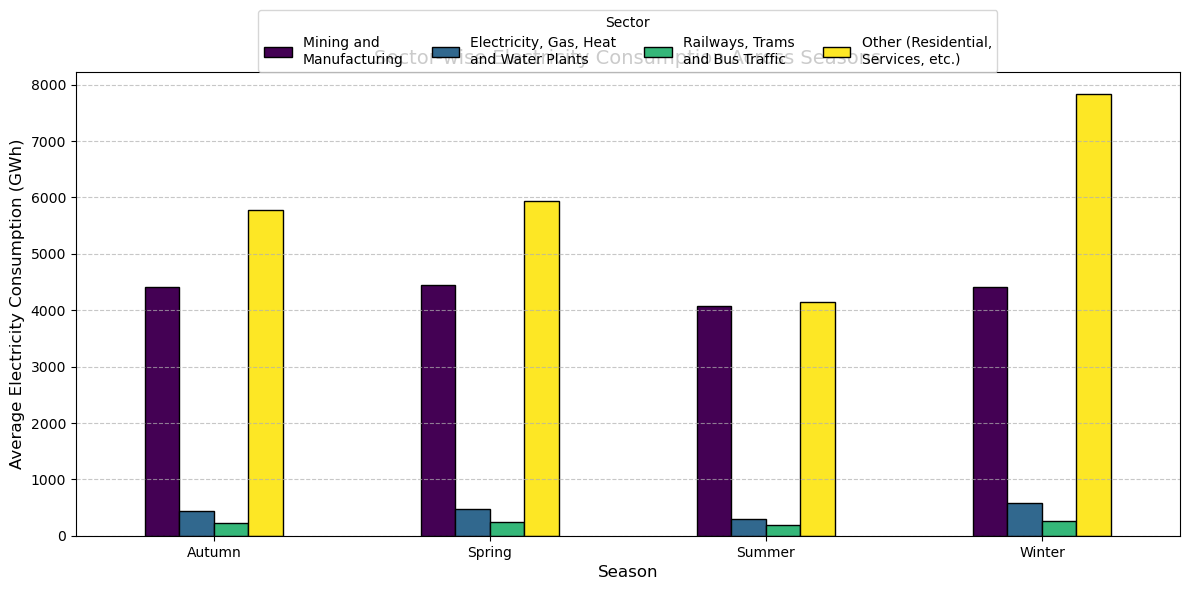

In [99]:
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

# Grouping data by season and calculating the mean for each sector
seasonal_avg_consumption = df.groupby("season")[
    ["mining and manufacturing",
     "electricity, gas, heat and water plants",
     "railways, trams and bus traffic",
     "other (residential sector, services, etc.)"]
].mean()

# Plotting sector-wise average consumption across seasons
plt.figure(figsize=(12, 6))
seasonal_avg_consumption.plot(kind="bar", figsize=(12, 6), colormap="viridis", edgecolor="black")

# Labels and title
plt.xlabel("Season", fontsize=12)
plt.ylabel("Average Electricity Consumption (GWh)", fontsize=12)
plt.title("Sector-wise Electricity Consumption Across Seasons", fontsize=14)
plt.xticks(rotation=0)

# Modify legend labels to have two lines
legend_labels = [
    "Mining and\nManufacturing",
    "Electricity, Gas, Heat\nand Water Plants",
    "Railways, Trams\nand Bus Traffic",
    "Other (Residential,\nServices, etc.)"
]

# Place legend at the top of the plot
plt.legend(title="Sector", labels=legend_labels, loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=4, fontsize=10)

plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Save the plot as a PDF (vectorized format)
plt.savefig("seasonal_consumption_plot_top_legend.pdf", format="pdf", bbox_inches="tight")

# Show the plot (optional)
plt.show()

<Figure size 1200x600 with 0 Axes>

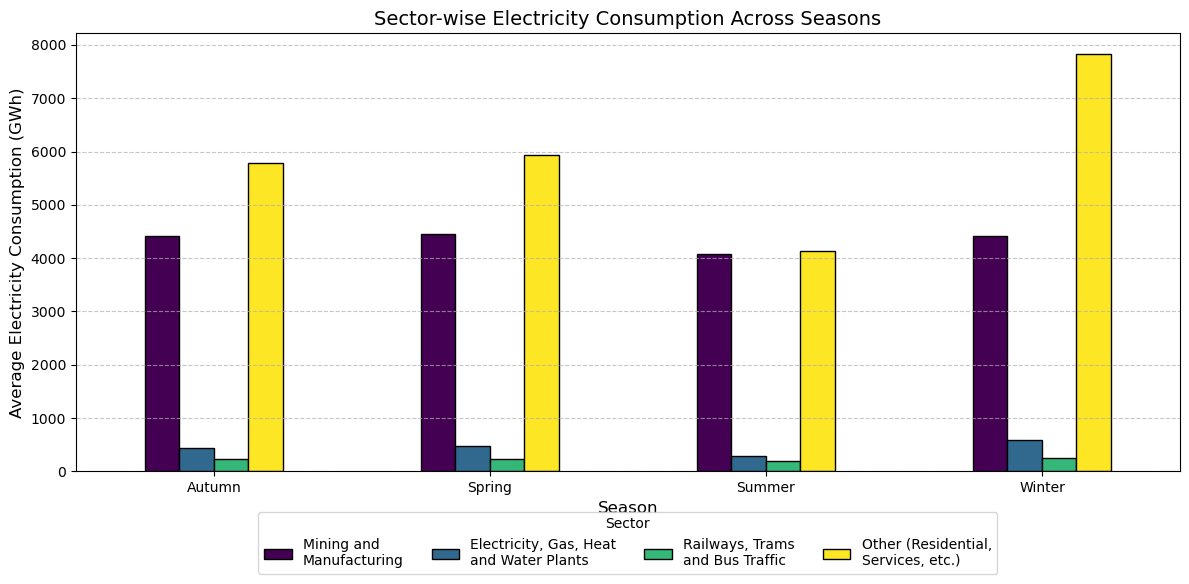

In [101]:
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

# Grouping data by season and calculating the mean for each sector
seasonal_avg_consumption = df.groupby("season")[
    ["mining and manufacturing",
     "electricity, gas, heat and water plants",
     "railways, trams and bus traffic",
     "other (residential sector, services, etc.)"]
].mean()

# Plotting sector-wise average consumption across seasons
plt.figure(figsize=(12, 6))
seasonal_avg_consumption.plot(kind="bar", figsize=(12, 6), colormap="viridis", edgecolor="black")

# Labels and title
plt.xlabel("Season", fontsize=12)
plt.ylabel("Average Electricity Consumption (GWh)", fontsize=12)
plt.title("Sector-wise Electricity Consumption Across Seasons", fontsize=14)
plt.xticks(rotation=0)

# Modify legend labels to have two lines
legend_labels = [
    "Mining and\nManufacturing",
    "Electricity, Gas, Heat\nand Water Plants",
    "Railways, Trams\nand Bus Traffic",
    "Other (Residential,\nServices, etc.)"
]

# Place legend at the bottom of the plot
plt.legend(title="Sector", labels=legend_labels, loc="lower center", bbox_to_anchor=(0.5, -0.25), ncol=4, fontsize=10)

plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Save the plot as a PDF (vectorized format)
plt.savefig("seasonal_consumption_plot_bottom_legend.pdf", format="pdf", bbox_inches="tight")

# Show the plot (optional)
plt.show()

<Figure size 1200x600 with 0 Axes>

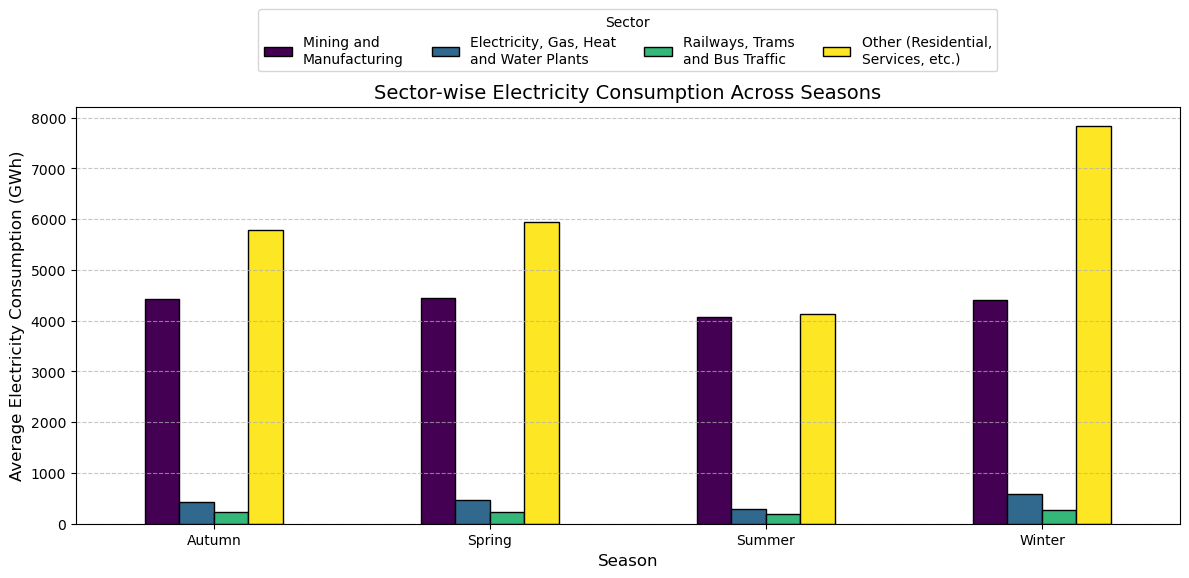

In [105]:
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

# Grouping data by season and calculating the mean for each sector
seasonal_avg_consumption = df.groupby("season")[
    ["mining and manufacturing",
     "electricity, gas, heat and water plants",
     "railways, trams and bus traffic",
     "other (residential sector, services, etc.)"]
].mean()

# Plotting sector-wise average consumption across seasons
plt.figure(figsize=(12, 6))
seasonal_avg_consumption.plot(kind="bar", figsize=(12, 6), colormap="viridis", edgecolor="black")

# Labels and title
plt.xlabel("Season", fontsize=12)
plt.ylabel("Average Electricity Consumption (GWh)", fontsize=12)
plt.title("Sector-wise Electricity Consumption Across Seasons", fontsize=14)
plt.xticks(rotation=0)

# Modify legend labels to have two lines
legend_labels = [
    "Mining and\nManufacturing",
    "Electricity, Gas, Heat\nand Water Plants",
    "Railways, Trams\nand Bus Traffic",
    "Other (Residential,\nServices, etc.)"
]

# Place legend further up above the plot
plt.legend(title="Sector", labels=legend_labels, loc="upper center", bbox_to_anchor=(0.5, 1.25), ncol=4, fontsize=10)

plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Save the plot as a PDF (vectorized format)
plt.savefig("seasonal_consumption_plot_top_legend_higher.pdf", format="pdf", bbox_inches="tight")

# Show the plot (optional)
plt.show()